# 2025-08-27 Function Errors

* Review last time

* Conditioning

* Well posedness

* Absolute & relative errors

* Condition numbers

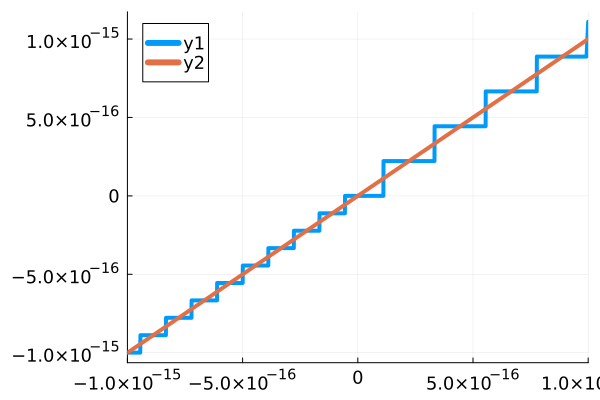

In [1]:
# Bad behavior for a function
using Plots
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

a = 1e-15
plot(x -> (1 + x) - 1, xlim=(-a, a))
plot!(x -> x)

## Machine precision

Floating point numbers do not exactly represent continuous values.

There exists $\epsilon_\text{machine}$ such that

$$ 1 \oplus x = 1 $$ for all $$ \lvert x \rvert < \epsilon_\text{machine} $$

Note: $\oplus, \ominus, \otimes, \oslash$ are the floating point arithmatic versions of $+, -, \times, /$

In [2]:
# Computing machine precision
ϵ = 1
while 1 + ϵ != 1
    ϵ = ϵ / 2
end

# And lets ask Julia what ϵ actually is
@show ϵ
@show eps();

ϵ = 1.1102230246251565e-16
eps() = 2.220446049250313e-16


In [3]:
# Number type matters!
ϵ = 1.0f0
while 1 + ϵ != 1
    ϵ = ϵ / 2
end

# And lets ask Julia what ϵ actually is
@show ϵ
@show eps(Float32);

ϵ = 5.9604645f-8
eps(Float32) = 1.1920929f-7


### Remember Taylor Series?

$$ log \left( 1 + x \right) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots $$

Which is more accurate for computing $log \left( 1 + x \right)$?

Note: This issue shows up in Ratel!

In [4]:
# Lets compare
f1(x) = log(1 + x)
f2(x) = x - x^2 / 2 + x^3 / 3 # Taylor series
# Question - how many terms do I need here?

y1 = f1(1e-8)
y2 = f2(1e-8)

# Absolute
println("absolute error: $(y1 - y2)")

# Relative
println("relative error: $((y1 - y2) / y2)")

absolute error: -6.07747099184471e-17
relative error: -6.077471022232065e-9


## Conditioning

A function $f \left( x \right)$ is **well conditioned** if a small change in the input $x$ results in a small change in the output $f \left( x \right)$. (ToDo: We should be precise about what 'small' means here!)

The function $f \left( x \right)$ may be a simple expression:

* $f \left( x \right) = 2 x$

* $f \left( x \right) = \sqrt{x}$

* $f \left( x \right) = \text{log} \left( x \right)$

* $f \left( x \right) = x - 1$ 

The function may also be much, much more complex:

* Find the positive root of the function $t^2 + \left( 1 - x \right) t - x$

* Find the eigenvectors of the matrix
$$ A \left( x \right) = \left[ \begin{array}{cc} 1 & 1 \\ 0 & x \end{array} \right] $$

* Find the deflection of the bridge when a truck of mass $x$ drives over it

* Determine the force required to fracture a composite material as a function of the manufacturing temperature $x$

* Determine the probability of component failure as a function of the age $x$

* Project the wind power generation given the current weather observations $x$

## Specification

Do we have enough information to solve the problem?

* Some of the previous problems are fully specified

* Others involve active, ongoing research

* The function modeling reality may be more or less smooth, ore or less behaved

* Is the problem **well-posed**?

## Well-posed Problems

A problem is **well-posed** if

1) The problem has a solution

2) The solution is unique

3) The solution's behavior changes continuously with initial conditions

For 3), the variation may be continuous but rapid, and there may be real-world sources of error or variance. **Conditioning** focuses on this part of **well-possedness**.

## Test case: $e^x$

$$ e^x = \sum_{k = 0}^\infty x^k / k! $$

In [5]:
# Let's try to code this up
function myexp(x)
    sum = 1
    for k in 1:100
        sum += x^k / factorial(big(k))
    end
    sum
end
@show myexp(1) - exp(1);

myexp(1) - exp(1) = 1.445646891729250136554224997792468345749669676277240766303534163549513721620773e-16


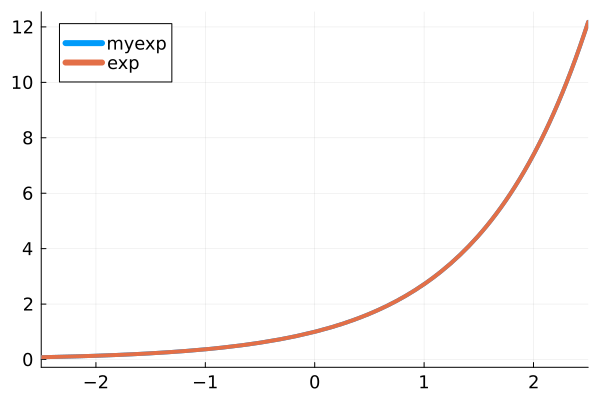

In [6]:
# looking good here
a = 2.5
plot([exp, myexp], xlims=[-a, a], label=["myexp" "exp"])

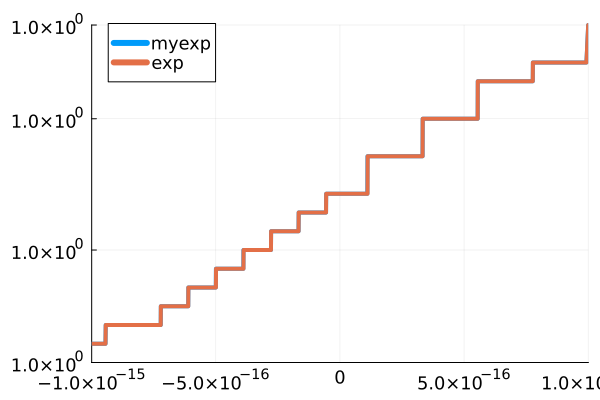

GKS: Possible loss of precision in routine SET_WINDOW


In [7]:
# but something is bad here
a = 1e-15
plot([exp, myexp], xlims=[-a, a], label=["myexp" "exp"])